# Autoencoder zum Entfernen von Bildrauschen

- Wie viel Bildrauschen ist noch okay für unseren Autoencoder?
- Kannst du noch was an der Architektur vom Netz optimieren?
- Funktioniert eine andere Aktivierungsfunktion besser?
- Funktioniert der Autoencoder auch auf den fashin-MNIST-Daten?
- Funktioniert der Autoencoder auch auf "richtigen" Bildern (z.B. cifar10)? Hinweis: Diese Bilder haben 3 Farbkanäle!

## Einlesen der MNIST-Daten

In [1]:
import gzip
import numpy as np
from keras.utils import to_categorical

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
Y_train = open_images("../data/mnist/train-images-idx3-ubyte.gz")
Y_test = open_images("../data/mnist/t10k-images-idx3-ubyte.gz")

Y_train = Y_train / 255.
Y_test = Y_test / 255.

# Aufprägen von Rauschen auf die Bilder (und auf gültigen Wertebereich clippen)
X_train = Y_train + np.random.normal(0, 0.2, Y_train.shape)
X_test = Y_test + np.random.normal(0, 0.2, Y_test.shape)


## Visualisierung der Bild und verrauschtem Bild

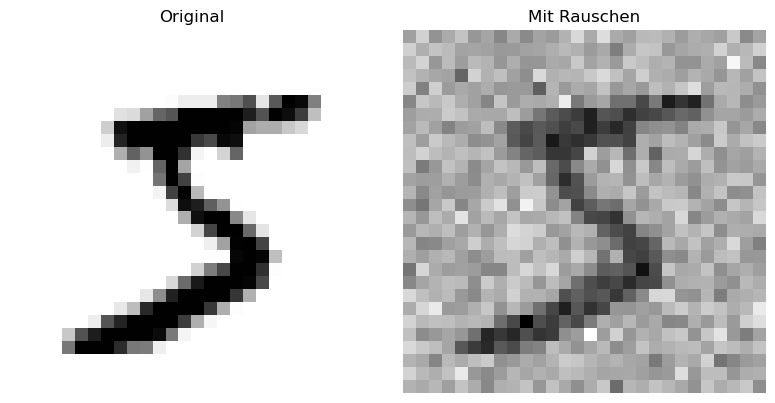

In [2]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(Y_train[0], cmap="gray_r")
axs[0].set_title("Original")
axs[0].axis("off")

axs[1].imshow(X_train[0], cmap="gray_r")
axs[1].set_title("Mit Rauschen")
axs[1].axis("off")

plt.tight_layout()
plt.show()

## Modelltraining

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

encoder = Sequential()
encoder.add(Conv2D(1, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)))
encoder.add(MaxPooling2D(pool_size=(2, 2)))
encoder.add(Conv2D(2, kernel_size=(3, 3), padding="same", activation="relu"))
encoder.add(MaxPooling2D(pool_size=(2, 2)))

decoder = Sequential()
decoder.add(Conv2D(2, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(7, 7, 2)))
decoder.add(UpSampling2D(size=(2, 2)))
decoder.add(Conv2D(4, kernel_size=(3, 3), padding="same", activation="relu"))
decoder.add(UpSampling2D(size=(2, 2)))
decoder.add(Conv2D(1, kernel_size=(3, 3), padding="same", activation="sigmoid"))

model = Sequential()
model.add(encoder)
model.add(decoder)

model.compile(optimizer="rmsprop", loss="mse")
model.summary()

/Users/alex/anaconda3/envs/ml/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 7, 7, 2)        │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 28, 28, 1)      │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.fit(X_train.reshape(-1, 28, 28, 1), Y_train.reshape(-1, 28, 28, 1), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0438
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0438
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0217
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0217
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0184
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0184
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0176
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0176
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0172
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0172
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0169
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0169
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0168
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0168
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━

## Visualisierung der Ergebnisse des trainierten Autoencoders

In [5]:
Y_test_pred = model.predict(X_test.reshape(-1, 28, 28, 1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


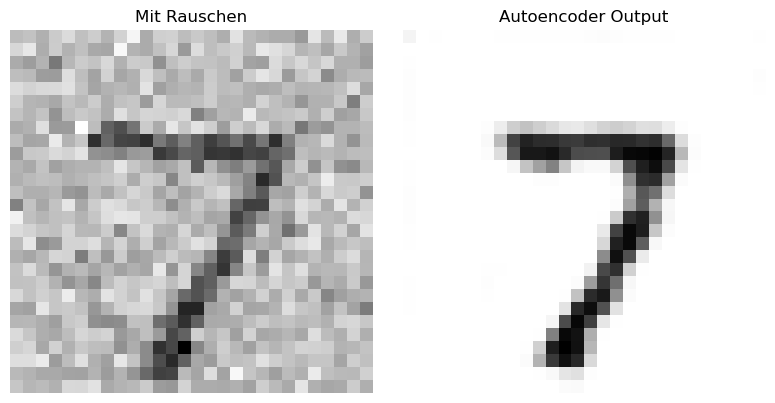

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(X_test[0].reshape(28, 28), cmap="gray_r")
axs[0].set_title("Mit Rauschen")
axs[0].axis("off")

axs[1].imshow(Y_test_pred[0].reshape(28, 28), cmap="gray_r")
axs[1].set_title("Autoencoder Output")
axs[1].axis("off")

plt.tight_layout()
plt.show()